Notebook to showcase the PACF

In [1]:
from brainiac_temporal.metrics.statistics import GraphStatistics
import networkx as nx
import numpy as np
import torch
from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader


Apply on ChickenpoxDataset

In [16]:
data = ChickenpoxDatasetLoader()

dataset = data.get_dataset()

graph_statistics = GraphStatistics("all", to_tensors=True)(dataset)



<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Calculation

In [18]:
from statsmodels.tsa.stattools import pacf
snapshots= graph_statistics["avg_clust_coeff"]
list_snapshots=[]
for snapshot in snapshots:
    
    list_snapshots.append(snapshot[0])        
metric_values= np.array(list_snapshots)    

# Compute the PACF for the snapshot
metric = pacf(metric_values, nlags= 200)


/home/houssem.souid/.pyenv/versions/3.8.13/envs/brainiac-1-temporal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1489: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


Visualisation

/home/houssem.souid/.pyenv/versions/3.8.13/envs/brainiac-1-temporal/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1489: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


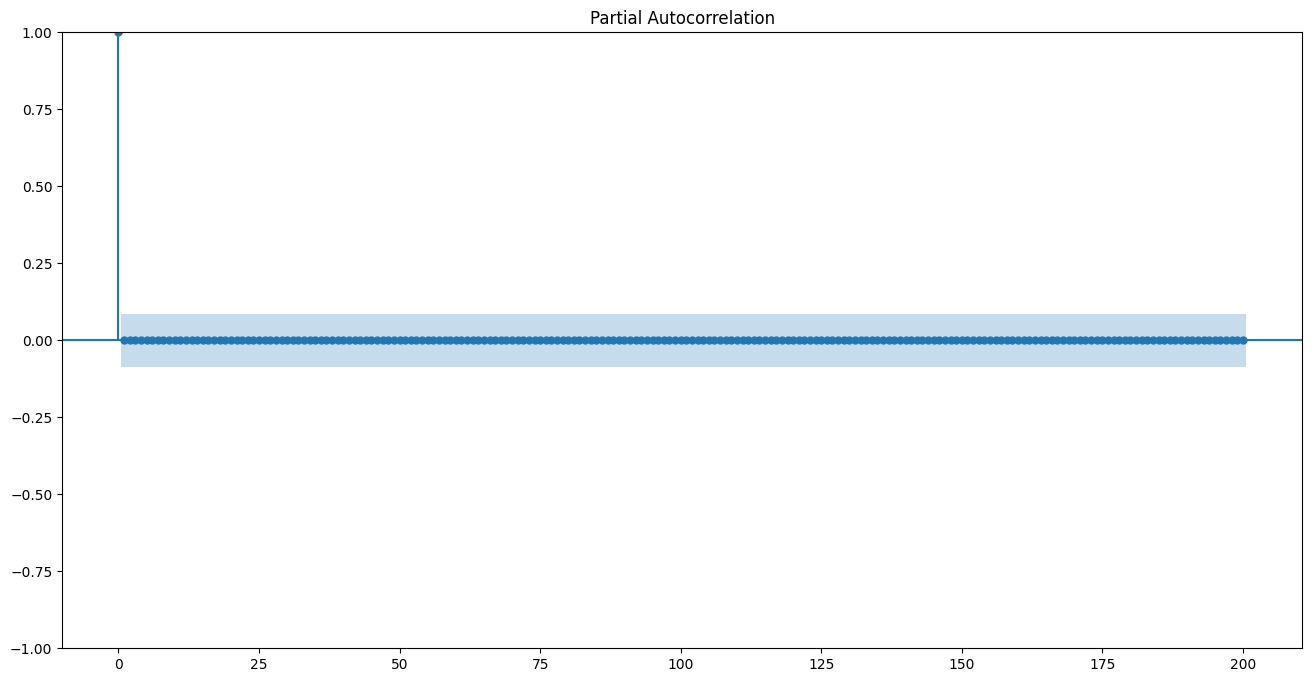

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
metric_name=  "katz_centrality"
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title(f'Partial Autocorrelation Function (PACF) for {metric_name}')

plot_pacf(metric_values, ax=ax, lags=200)
plt.show()